In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from pylab import arange
#from functools import reduce
#from operator import mul

%matplotlib inline

In [2]:
def sin_f(x):
    return np.sin(x)+np.sin(2*x)+np.

def sin_poly(x):
    return x**2+10*np.sin(x)*x

def sin_poly2(x):
    return x**3+30*np.sin(x)*x

def poly_n(x):
    return x**7-40*x**5+33*x**3-x**2

<center> <h1> ``` ---- Cubic Splines ---- ``` </h1> </center>

In [53]:
def cub_graph(a, b, c, d, x_i, x_i_1):
    def f(x):
        return a + b * (x - x_i) + c * (x - x_i) ** 2 + d * (x - x_i) ** 3
    pts = arange(x_i, x_i_1, 0.001)
    plt.plot(pts, f(pts), '-')
    #plt.plot(x_i_1, f(x_i_1), 'ro')

In [36]:
def cubicSpline(n, xn, a):

    h = np.zeros(n-1)
    for i in range(n - 1):
        h[i] = xn[i + 1] - xn[i]

    alpha =  np.zeros(n - 1)
    for i in range(1, n - 1):
        alpha[i] = 3. / h[i] * (a[i + 1] - a[i]) - 3. / h[i - 1] * (a[i] - a[i - 1])

    l =  np.zeros(n + 1)
    u =  np.zeros(n)
    z =  np.zeros(n + 1)
    l[0] = 1

    for i in range(1, n - 1):
        l[i] = 2 * (xn[i + 1] - xn[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = 1
    z[n] = 0

    b = np.zeros(n)
    c = np.zeros(n + 1)
    d = np.zeros(n)

    for j in range(n - 2, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (a[j + 1] - a[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3.
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])

    for j in range(n - 1):
        cub_graph(a[j], b[j], c[j], d[j], xn[j],xn[j + 1],)
    plt.show()

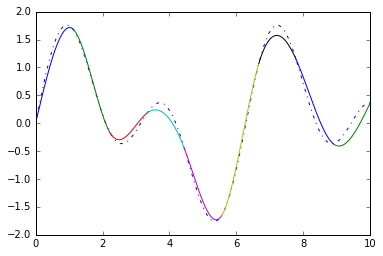

In [54]:
x = np.linspace(0, 10, 100)
xx = np.linspace(0, 10, 10)

plt.plot(x, sin_f(x), 'b-.')

cubicSpline(10, xx, sin_f(xx))

<center> <h1> ``` ---- Gauss ---- ``` </h1> </center>

In [6]:
def poly(a):
    return lambda x: np.dot(a, [x ** i for i in range(len(a))])
def simple(x, y):
    n = len(x)
    A = np.ones(n)
    c = x.copy()
    for i in range(n - 1):
        A = np.c_[A, c]
        c *= x
    return poly(np.linalg.solve(A, y))

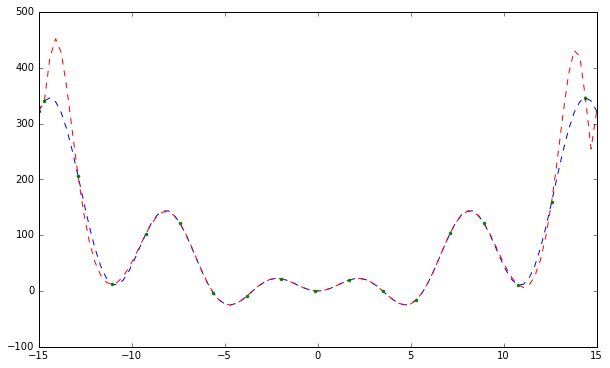

In [7]:
x = np.linspace(-15, 15, 100)
plt.subplots(figsize=(10, 6))



xx = np.r_[x[0], x[1: -1: 6], x[-1]]
y = sin_poly(xx)

g = simple(xx, y)

plt.plot(x, sin_poly(x), 'b--')
plt.plot(x, g(x), 'r--')
plt.plot(xx, g(xx), 'g.')
plt.show()

<center> <h1> ```---- Lagrange ---- ``` </h1> </center>

In [8]:
def lagrange(x, y):
    t = sp.Symbol("t")
    n = len(y)
    res = 0
    for i in range(n):
        frac = 1
        for j in range(n):
            if j != i:
                frac *= (t - x[j]) / (x[i] - x[j]) 
        res += frac * y[i]
    res = sp.simplify(res)
    return lambda x: res.evalf(subs={t: x})

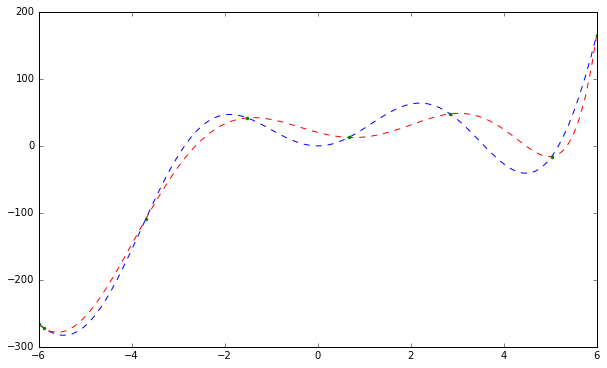

In [9]:
x = np.linspace(-6, 6, 100)
plt.subplots(figsize=(10, 6))



xx = np.r_[x[0], x[1: -1: 18], x[-1]]
y = sin_poly2(xx)
f = lagrange(xx, y)

plt.plot(x, sin_poly2(x), 'b--')
plt.plot(x, np.array([f(x) for x in x]), 'r--')
plt.plot(xx, np.array([f(x) for x in xx]), 'g.')

plt.show()

<center> <h1> ``` ---- Newton ---- ``` </h1> </center>

In [10]:
def divided_diff(x, y):
    # http://adorio-research.org/wordpress/?p=11165
    c = y[:]
    n = len(x) 
    for i in range(1, n):
        for j in range(n-1, i-1, -1):
            c[j] = (c[j] - c[j-1])/(x[j]-x[j-i])
    return c

In [11]:
def newtonPolynomial(x, y):    
    n = len(x)
    diff = divided_diff(x, y)
    t = sp.Symbol("t")
    pt = 0 
    for i in range(n):
        temp = diff[i]
        for j in range(i):
            temp *= t - x[j]
        pt += temp
    pt = sp.simplify(pt)
    print(pt)
    return lambda x: pt.evalf(subs={t: x})


19642.6854402612*t**5 - 122786.893524574*t**4 - 107591997.285448*t**3 + 1429594733.60627*t**2 + 107651758828.354*t - 2017257993605.44


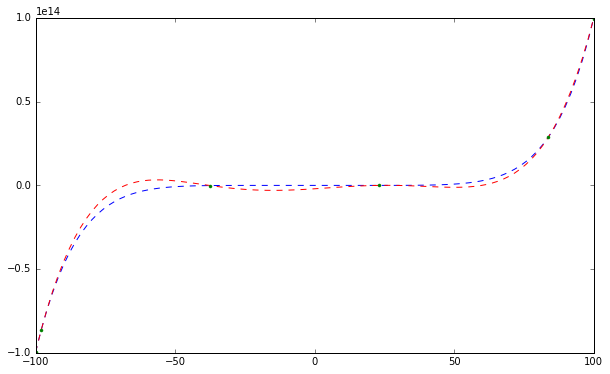

In [14]:
x = np.linspace(-100, 100, 100)
plt.subplots(figsize=(10, 6))


xx = np.r_[x[0], x[1: -1: 30], x[-1]]
y = poly_n(xx)
f = newtonPolynomial(xx, y)

plt.plot(x, poly_n(x), 'b--')
plt.plot(x, np.array([f(x) for x in x]), 'r--')
plt.plot(xx, np.array([f(x) for x in xx]), 'g.')

plt.show()